<font size="5"><b>Data Visualization with Pandas</b><font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

We can use plt.style.available to see a list of predefined styles available in Matplotlib. The %matplotlib notebook magic command above optimizes the plots for displaying them in jupyter notebooks.

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

So this provides us with a list of styles available. In order to use a style, we simply give the command plt.style.use(<style name>). Let's use ggplot for now and see how it changes the default style. Feel free to try other styles and see how they impact the look and feel of the plots!

In [3]:
plt.style.use('bmh')

For the purpose of this notebook and as it will be just exercises to show the power and usefulness of Pandas built-in visualization features, I will create a synthetic tempora DataFrame with the following steps:

- Data frame with three columns A, B, and C
- For data in each column, we will use a random number generator to generate 365 numbers (to reflect days in a year) using np.random.randn()
- Using numpy's .cumsum() (cumulative sum) method, we will cumulatively sum the generated random numbers in each column
- Offset column B by +25 and column C by -25 with respect to Column A, which will remain unchanged
- Using pd.date_range(), set the index to be every day in 2018 (starting from 1st of January)

I'll also set a seed for controlling the randomization, allowing anyone to reproduce the data.

It is always a good idea to set a random seed when dealing with probabilistic outputs.

In [4]:
np.random.seed(123)

data = pd.DataFrame({'A':np.random.randn(365).cumsum(), 
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25},
                   index = pd.date_range('1/1/2020', periods = 365))
data.head(3).append(data.tail(3))

,A,B,C
2020-01-01,-1.085631,25.059291,-25.230904
2020-01-02,-0.088285,26.803332,-21.659325
2020-01-03,0.194693,25.835588,-22.055481
2020-12-28,-16.780118,42.607936,-64.615350
2020-12-29,-16.104155,42.880671,-66.557482
2020-12-30,-17.090959,43.306007,-66.894074


The easiest plot would be to just use plot:

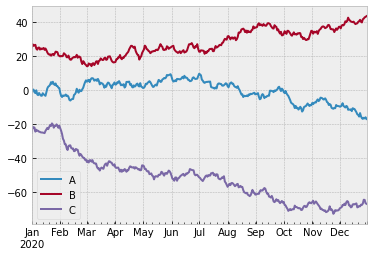

In [5]:
data.plot()
plt.show()

As you can see you didn't have to define your canvas, Pandas has it all ready for you.

The DataFrame.plot() method iss just a ssimple wrapper around plt.plot() that draws line plots. Therefore, when you call data.plot() you will basically get a line graph of all the columns in the data frame with labels

Another powerful tool with Pandas is that you can change between multiple type of plots. Here is a list of them:

- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot
- ‘hexbin’ : hexbin plot

I'll try a few of them...

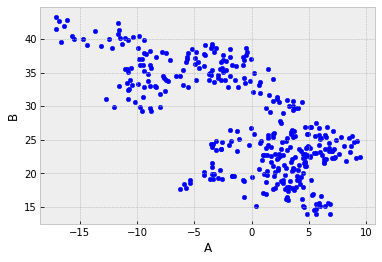

In [6]:
data.plot('A', 'B', kind = 'scatter')
plt.show()

The same plot can be done by choosing the plot "kind" at the beginning...like this:

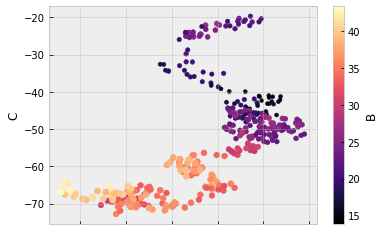

In [15]:
image = data.plot.scatter('A', 'C', c = 'B', s=data['B'], colormap = 'magma')
plt.show()

Above, A and C columns plotted against one another with graduating color and changing the size and based on the values of the `'B'` column. 

> A complete list of colormaps is available at [Official Documentation](https://matplotlib.org/examples/color/colormaps_reference.html). 

Let's try briefly some other plot types:

# Box Plots

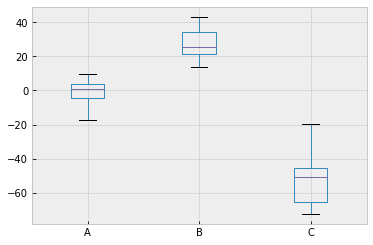

In [24]:
data.plot.box()
plt.show()

# Histograms

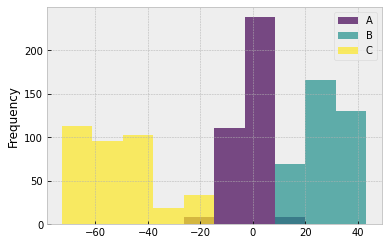

In [27]:
data.plot.hist(alpha=0.7, colormap='viridis')
plt.show()

# Kernel Density plots

Useful for visualizing an estimate of a variable's probability density function

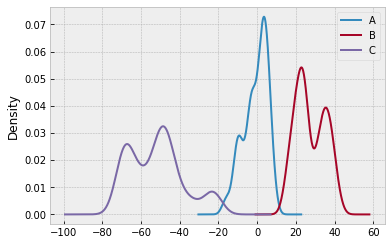

In [30]:
data.plot.kde()
plt.show()

===================================================================

===================================================================

<font size = '4'><b>Visualizations using high dimensional data</b><font>

For this exercise I'll be using the very famous iris flower dataset which you can find in Kaggle or many other sources. 

In [31]:
df =pd.read_csv('iris.csv')
df.head(3).append(df.tail(3))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Scatter Matrix 

One of the cool things that we can do with this reach DataFrame is a scatter matrix. This allows us to compare each column in the DataFrame to every other column in a pairwise fashion.

The scatter matrix will create scatter plots between the difference variables and histograms along the diagonals

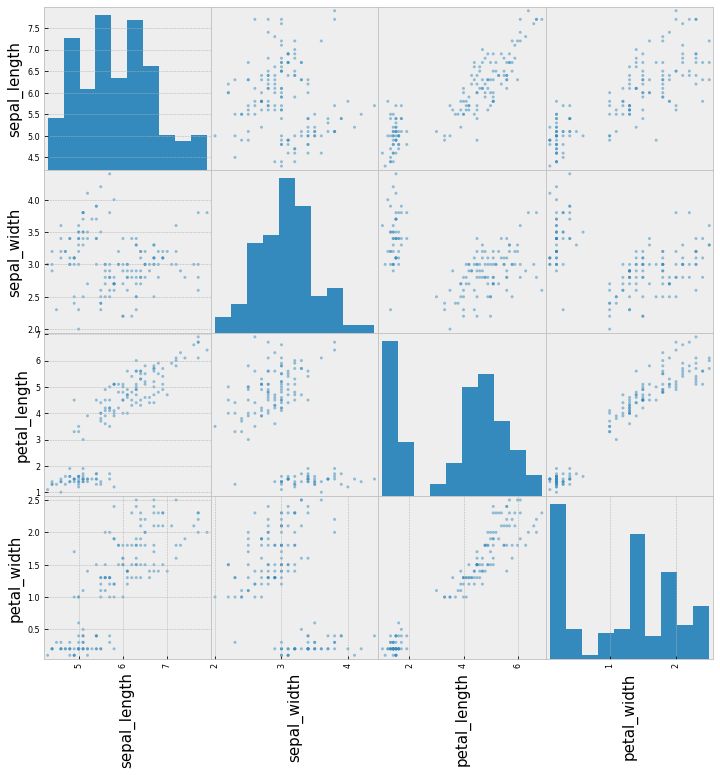

In [48]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(12,12))

# For loop to set 
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15)
    
plt.show()


# Parallel Plot

If you are dealing with high dimensional <b>multivariate data</b>, Pandas has a tool for dealing with parallel coordinate plot:

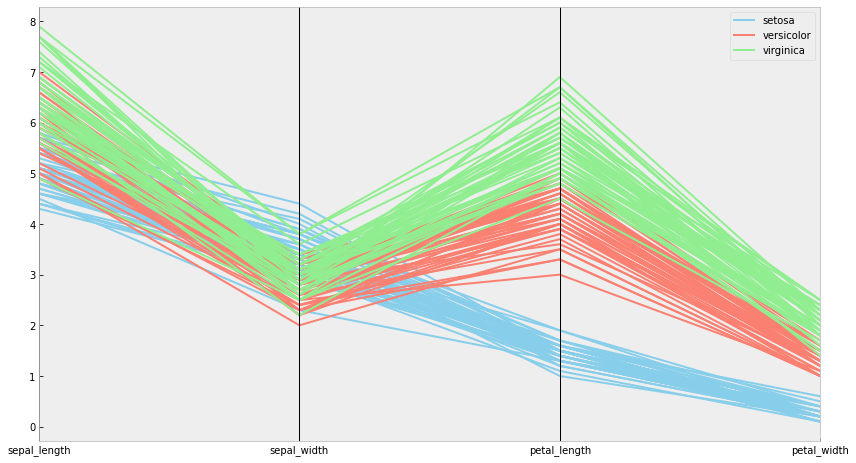

In [58]:
# First thing is to set the colors of the variables, in this case, the species:

colormap = ('skyblue', 'salmon', 'lightgreen')

plt.figure(figsize=(14,8))
pd.plotting.parallel_coordinates(df, 'species', color=colormap)

plt.show()